In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Input
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load and prepare the data
data = pd.read_csv('/content/CICIDS.csv')

In [ ]:
print(data.head())

    Destination Port   Flow Duration   Total Fwd Packets  \
0               3268       112740690                  32   
1                389       112740560                  32   
2                  0       113757377                 545   
3               5355          100126                  22   
4                  0           54760                   4   

    Total Backward Packets  Total Length of Fwd Packets  \
0                       16                         6448   
1                       16                         6448   
2                        0                            0   
3                        0                          616   
4                        0                            0   

    Total Length of Bwd Packets   Fwd Packet Length Max  \
0                          1152                     403   
1                          5056                     403   
2                             0                       0   
3                             0                 

In [ ]:
print(data.tail())

         Destination Port   Flow Duration   Total Fwd Packets  \
171676                 53             251                   2   
171677                443        61331969                  13   
171678                 53           60079                   2   
171679                 53           23754                   2   
171680                443        39963092                  13   

         Total Backward Packets  Total Length of Fwd Packets  \
171676                        2                           60   
171677                       15                         3594   
171678                        2                           68   
171679                        2                           70   
171680                       14                         3610   

         Total Length of Bwd Packets   Fwd Packet Length Max  \
171676                           344                      30   
171677                          4405                    2896   
171678                          

In [ ]:
print(data.describe())

        Destination Port   Flow Duration   Total Fwd Packets  \
count      171681.000000    1.716810e+05       171681.000000   
mean         6710.091653    1.180314e+07           14.610487   
std         16652.909653    3.088132e+07         1157.923268   
min             0.000000   -1.200000e+01            1.000000   
25%            53.000000    1.980000e+02            2.000000   
50%            80.000000    3.121100e+04            2.000000   
75%           443.000000    3.937960e+05            4.000000   
max         64948.000000    1.200000e+08       207964.000000   

        Total Backward Packets  Total Length of Fwd Packets  \
count            171681.000000                 1.716810e+05   
mean                 17.505548                 6.058054e+02   
std                1560.901978                 8.331606e+03   
min                   0.000000                 0.000000e+00   
25%                   1.000000                 4.100000e+01   
50%                   2.000000               

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171681 entries, 0 to 171680
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             171681 non-null  int64  
 1    Flow Duration                171681 non-null  int64  
 2    Total Fwd Packets            171681 non-null  int64  
 3    Total Backward Packets       171681 non-null  int64  
 4   Total Length of Fwd Packets   171681 non-null  int64  
 5    Total Length of Bwd Packets  171681 non-null  int64  
 6    Fwd Packet Length Max        171681 non-null  int64  
 7    Fwd Packet Length Min        171681 non-null  int64  
 8    Fwd Packet Length Mean       171681 non-null  float64
 9    Fwd Packet Length Std        171681 non-null  float64
 10  Bwd Packet Length Max         171681 non-null  int64  
 11   Bwd Packet Length Min        171681 non-null  int64  
 12   Bwd Packet Length Mean       171681 non-nul

In [ ]:
print(data.columns.tolist())


[' Destination Port', ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance', 'FIN Flag Count', ' SYN Flag Count', ' RST Flag Count', ' PSH Flag Count', ' ACK Flag Count', ' URG Flag 

In [ ]:
data.columns = data.columns.str.strip()


In [ ]:
print(data.columns.tolist())


['Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'CWE Flag Count', 'ECE Flag Count

In [ ]:
# Encode categorical columns and remove any non-numeric columns as necessary
categorical_cols = ['Destination Port', 'Total Fwd Packets']
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])


In [ ]:
# Separate features and labels
X = data.drop('Label', axis=1)
y = data['Label'].apply(lambda x: 1 if x == 'Anomaly' else 0)  # Binary label: 1 for anomaly, 0 for normal



In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Check for NaN and infinite values
print("Checking for NaN values in training data:")
print(X_train.isnull().sum())
print("Checking for infinite values in training data:")
print(np.isinf(X_train).sum())



Checking for NaN values in training data:
Destination Port               0
Flow Duration                  0
Total Fwd Packets              0
Total Backward Packets         0
Total Length of Fwd Packets    0
                              ..
Active Min                     1
Idle Mean                      1
Idle Std                       1
Idle Max                       1
Idle Min                       1
Length: 78, dtype: int64
Checking for infinite values in training data:
Destination Port               0
Flow Duration                  0
Total Fwd Packets              0
Total Backward Packets         0
Total Length of Fwd Packets    0
                              ..
Active Min                     0
Idle Mean                      0
Idle Std                       0
Idle Max                       0
Idle Min                       0
Length: 78, dtype: int64


In [ ]:
# Handle NaN and infinite values
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)



In [ ]:
# Fill NaN values with the mean of each column
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)



In [ ]:
# Standardize the data based on training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Standardization completed successfully.")

Standardization completed successfully.


In [ ]:

# Use only normal (non-anomaly) data to train the autoencoder
X_train_normal = X_train_scaled[y_train == 0]

In [ ]:
# Autoencoder Model for feature extraction
input_dim = X_train_normal.shape[1]
encoding_dim = 14

In [ ]:
 #Encoder part
input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation='relu')(input_layer)
encoder = Dense(7, activation='relu')(encoder)

# Decoder part
decoder = Dense(encoding_dim, activation='relu')(encoder)
decoder = Dense(input_dim, activation='sigmoid')(decoder)

# Autoencoder Model
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='mse')

In [ ]:
# Train the Autoencoder
history = autoencoder.fit(X_train_normal, X_train_normal,
                          epochs=10,
                          batch_size=32,
                          validation_split=0.2)




Epoch 1/10
3434/3434 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.8250 - val_loss: 0.5225
Epoch 2/10
3434/3434 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.5653 - val_loss: 0.5148
Epoch 3/10
3434/3434 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.5993 - val_loss: 0.5113
Epoch 4/10
3434/3434 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.7808 - val_loss: 0.5106
Epoch 5/10
3434/3434 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - loss: 0.7330 - val_loss: 0.5091
Epoch 6/10
3434/3434 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - loss: 0.6332 - val_loss: 0.5087
Epoch 7/10
3434/3434 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - loss: 0.7834 - val_loss: 0.5084
Epoch 8/10
3434/3434 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - loss: 0.7334 - val_loss: 0.5087
Epoch 9/10
3434/3434 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.7731 - val_loss: 0.5083
Epoch 10/10
3434/3434 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.7128 - val_loss: 0.5078


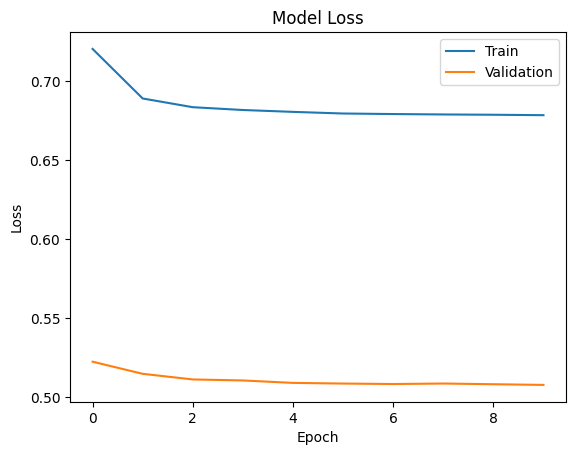

In [ ]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
# Use encoder part for feature extraction
encoder_model = Model(inputs=input_layer, outputs=encoder)
X_train_encoded = encoder_model.predict(X_train_scaled)
X_test_encoded = encoder_model.predict(X_test_scaled)

4292/4292 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
1074/1074 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


In [ ]:
# MLP Model for classification
mlp_model = Sequential([
    Dense(64, input_dim=X_train_encoded.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])




/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
mlp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the MLP on the encoded features
mlp_history = mlp_model.fit(X_train_encoded, y_train,
                            epochs=10,
                            batch_size=32,
                            validation_data=(X_test_encoded, y_test))



Epoch 1/10
4292/4292 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9906 - loss: 0.0263 - val_accuracy: 1.0000 - val_loss: 4.2079e-08
Epoch 2/10
4292/4292 ━━━━━━━━━━━━━━━━━━━━ 26s 4ms/step - accuracy: 1.0000 - loss: 2.8308e-08 - val_accuracy: 1.0000 - val_loss: 3.3486e-09
Epoch 3/10
4292/4292 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 1.0000 - loss: 6.1137e-09 - val_accuracy: 1.0000 - val_loss: 4.1368e-10
Epoch 4/10
4292/4292 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 1.0000 - loss: 4.3123e-10 - val_accuracy: 1.0000 - val_loss: 7.5882e-11
Epoch 5/10
4292/4292 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 1.0000 - loss: 1.2530e-10 - val_accuracy: 1.0000 - val_loss: 2.3733e-11
Epoch 6/10
4292/4292 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 1.0000 - loss: 5.0370e-11 - val_accuracy: 1.0000 - val_loss: 9.3235e-12
Epoch 7/10
4292/4292 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 1.0000 - loss: 4.7985e-11 - val_accuracy: 1.0000 - val_loss: 4.6550e-12
Epoch 8/10
4292/4292 ━━━━━━━━━━━━━━

In [ ]:
# Evaluation on the test set
y_pred = (mlp_model.predict(X_test_encoded) > 0.5).astype(int)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


1074/1074 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34337

    accuracy                           1.00     34337
   macro avg       1.00      1.00      1.00     34337
weighted avg       1.00      1.00      1.00     34337

Confusion Matrix:
[[34337]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
